In [31]:
import pandas as pd
import plotly.graph_objects as go

In [32]:
estimand = 'IV' # IV, ObsShock, or Recurisve
metric = 'medbias' # medbias, std, iqr, bias

filepath = 'fig/baseline/lag4/DFM_' + estimand + '/'
csv_filename = filepath + estimand + '_loss_' + metric + '_regcat.csv'  # Replace with your CSV file name

title = metric + ' for estimand type: ' + estimand

In [44]:
def plot_csv_data(csv_filename, title, write_html):
    # Read the CSV file
    df = pd.read_csv(csv_filename, index_col=0)

    # Select columns from 'h0' to 'h19'
    rows_to_plot = [f'h{i}' for i in range(20)]
    df_plot = df.loc[rows_to_plot]
    
    fig = go.Figure()
    for column_name, column_data in df_plot.items():
        fig.add_trace(go.Scatter(x=list(range(20)), y=column_data.values, mode='lines', name=column_name))
    
    fig.update_layout(
            title='Plot of ' + title,
            xaxis_title='Horizon (h0 to h19)',
            yaxis_title='Value',
            legend_title='Methods',
            height = 800,
            width = 1600
        )
        
    # Show the plot
    fig.show()
    if write_html == 1:
        fig.write_html("py_plots/title.html")
    else: 
        pass

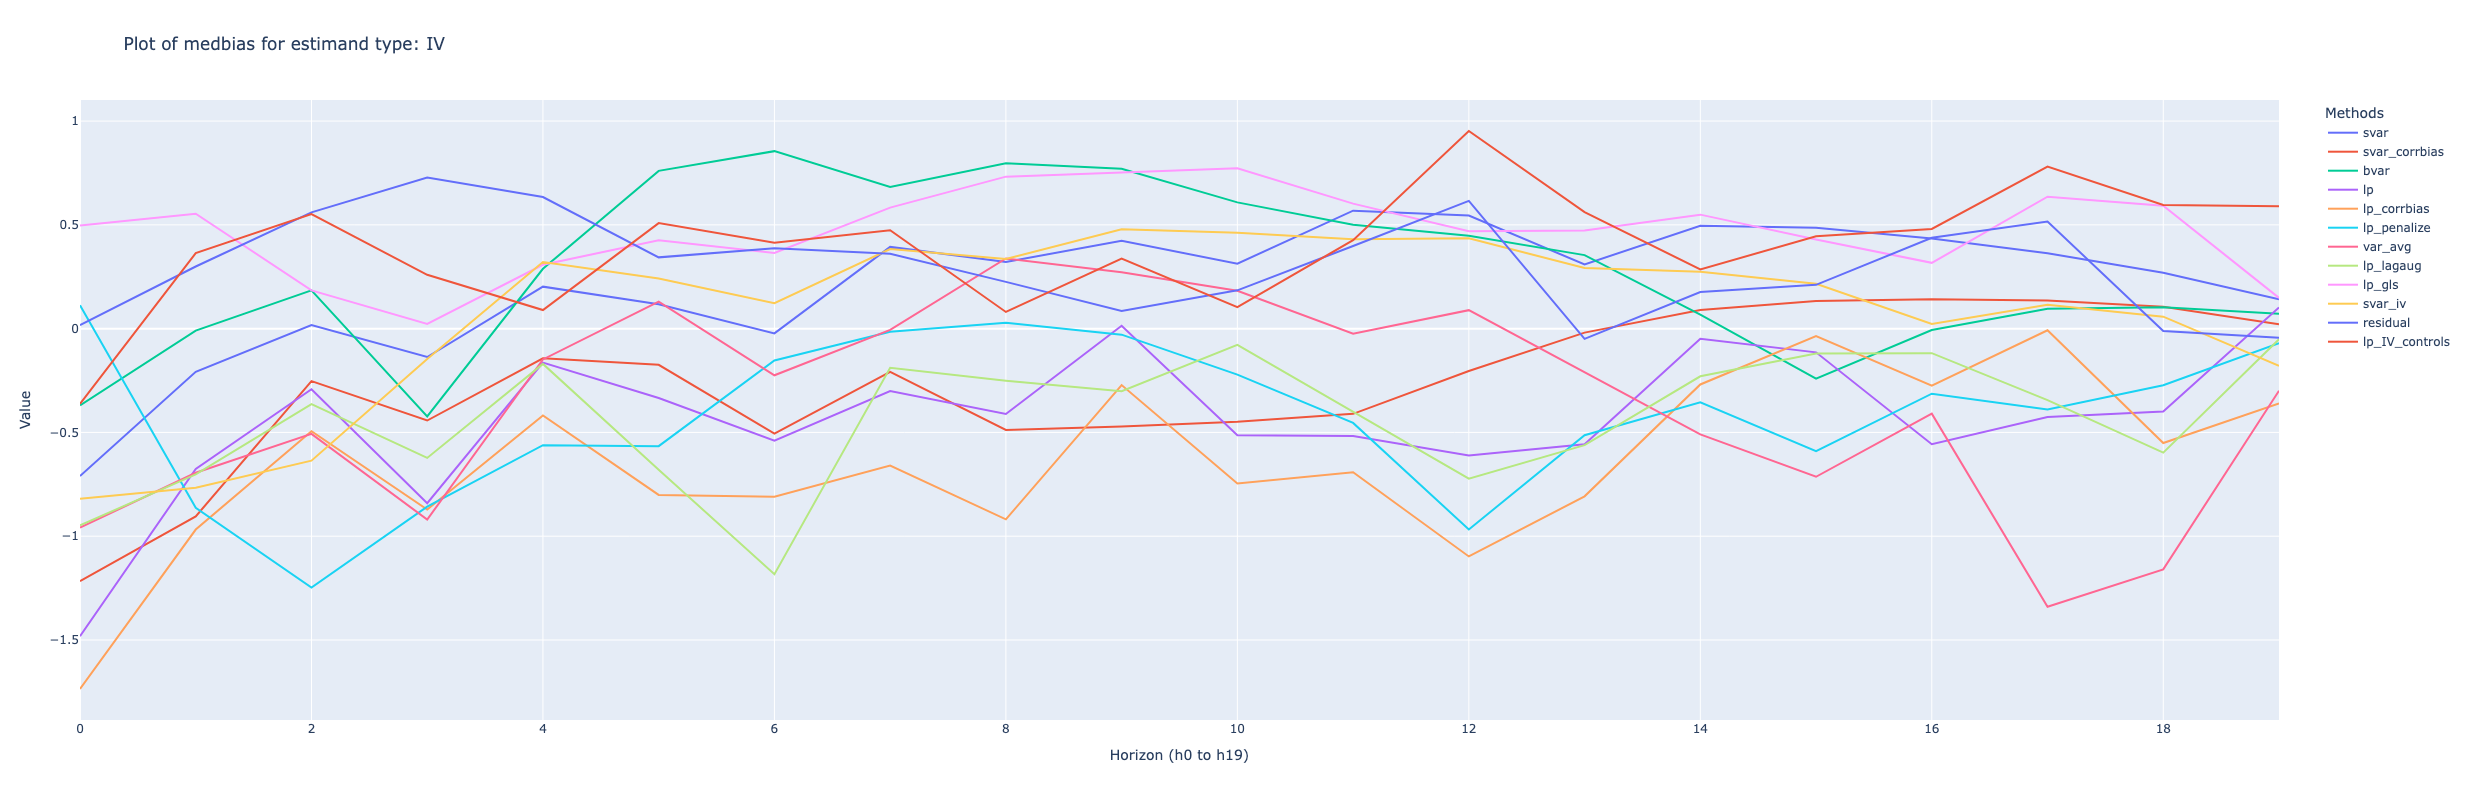

In [45]:
plot_csv_data(csv_filename, title, 1)
